In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
spy =pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/SPY.csv',index_col ='Date')['Adj Close'])

In [3]:
tlt =pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/TLT.csv',index_col ='Date')['Adj Close'])

In [4]:
btc =pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/BTC-USD.csv',index_col ='Date')['Adj Close'])

In [5]:
vxx =pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/VXX.csv',index_col ='Date')['Adj Close'])

In [6]:
xlf=pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/XLF.csv',index_col ='Date')['Adj Close'])

In [7]:
fxi =pd.DataFrame(pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment6/FXI.csv',index_col ='Date')[ 'Adj Close'])

In [8]:
print(len(spy),len(tlt), len(btc), len(vxx),len(xlf), len(fxi) )

755 755 1097 755 755 755


In [9]:


combined1 = pd.merge(btc, spy, left_index=True, right_index=True, how='outer')

In [10]:
combined1.columns =['btc','spy']

In [11]:
combined2 = pd.merge(combined1, tlt, left_index=True, right_index=True, how='outer')


In [12]:
combined2.columns =['btc','spy', 'tlt']

In [13]:
combined3 = pd.merge(combined2, vxx, left_index=True, right_index=True, how='outer')

In [14]:
combined3.columns =['btc','spy', 'tlt','vxx']

In [15]:
combined4 = pd.merge(combined3, xlf, left_index=True, right_index=True, how='outer')

In [16]:
combined4.columns =['btc','spy', 'tlt','vxx', 'xlf']

In [17]:
#drop the btc adj return in weekends
combined5 = pd.merge(combined4, fxi, left_index=True, right_index=True, how='inner')

In [18]:
combined5.columns =['btc','spy', 'tlt','vxx', 'xlf', 'fxi']

In [19]:
combined5.head()

,btc,spy,tlt,vxx,xlf,fxi
Date,,,,,,
2015-03-09,290.019989,196.044159,115.734543,442.559998,14.388450,39.373985
2015-03-10,291.369995,192.863953,117.257355,456.160004,14.081054,38.458961
2015-03-11,295.600006,192.412338,118.111649,467.679993,14.169726,38.553299
2015-03-12,293.850006,194.858627,118.028046,439.679993,14.477120,38.940056
2015-03-13,287.209991,193.663681,117.665939,449.600006,14.376628,39.138153


In [20]:
# calculate daily and annual returns of the stocks
daily_returns = combined5.pct_change(1)
annual_returns= (daily_returns.mean()+1) ** 252-1
#annual_returns = (combined5.iloc[-1]/combined5.iloc[0])**(1/3) -1

In [21]:
annual_returns  

btc    3.315230
spy    0.126030
tlt    0.014784
vxx   -0.424494
xlf    0.298959
fxi    0.096668
dtype: float64

In [22]:
# get daily and covariance of returns of the stock
daily_covariance = daily_returns.cov()
annual_covariance = daily_covariance * 252

In [23]:
daily_covariance

,btc,spy,tlt,vxx,xlf,fxi
btc,0.002041,0.000019,0.000003,-0.000039,0.000016,-0.000006
spy,0.000019,0.000065,-0.000021,-0.000292,0.000074,0.000082
tlt,0.000003,-0.000021,0.000062,0.000088,-0.000041,-0.000030
vxx,-0.000039,-0.000292,0.000088,0.001832,-0.000344,-0.000383
xlf,0.000016,0.000074,-0.000041,-0.000344,0.000242,0.000093
fxi,-0.000006,0.000082,-0.000030,-0.000383,0.000093,0.000228


In [24]:
annual_covariance

,btc,spy,tlt,vxx,xlf,fxi
btc,0.514416,0.004759,0.000655,-0.009850,0.004047,-0.001565
spy,0.004759,0.016326,-0.005182,-0.073478,0.018654,0.020766
tlt,0.000655,-0.005182,0.015600,0.022132,-0.010457,-0.007530
vxx,-0.009850,-0.073478,0.022132,0.461633,-0.086668,-0.096414
xlf,0.004047,0.018654,-0.010457,-0.086668,0.060978,0.023314
fxi,-0.001565,0.020766,-0.007530,-0.096414,0.023314,0.057419


In [25]:
stocks_selected = ['btc','spy', 'tlt','vxx', 'xlf', 'fxi']

In [26]:
#empty lists to store returns, volatility and weights of imiginary portfolios
returns_list = []
volatility_list = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(stocks_selected)
num_portfolios = 50000


In [27]:
np.random.random(num_assets)

array([0.27989812, 0.83813272, 0.36188451, 0.23493354, 0.80410617,
       0.32338814])

In [28]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
    sharpe = (returns-0.015) / volatility
    sharpe_ratio.append(sharpe)
    returns_list.append(returns)
    volatility_list.append(volatility)
    stock_weights.append(weights)

In [29]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': returns_list,
             'Volatility': volatility_list,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for ct,ticker in enumerate(stocks_selected):
    portfolio[ticker+' Weight'] = [Weight[ct] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
portf = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
columns_na = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks_selected]

# reorder dataframe columns
portf= portf[columns_na]
portf.head()

,Returns,Volatility,Sharpe Ratio,btc Weight,spy Weight,tlt Weight,vxx Weight,xlf Weight,fxi Weight
0,0.681028,0.193977,3.433541,0.216295,0.320729,0.079484,0.240691,0.053046,0.089755
1,0.720668,0.183591,3.843698,0.216482,0.104452,0.162840,0.196120,0.196342,0.123765
2,0.401715,0.194764,1.985562,0.138588,0.106267,0.028158,0.326882,0.141073,0.259033
3,0.990539,0.217507,4.485091,0.281983,0.120241,0.253893,0.009449,0.041892,0.292542
4,0.944910,0.200257,4.643578,0.259152,0.091385,0.193934,0.044126,0.248852,0.162551


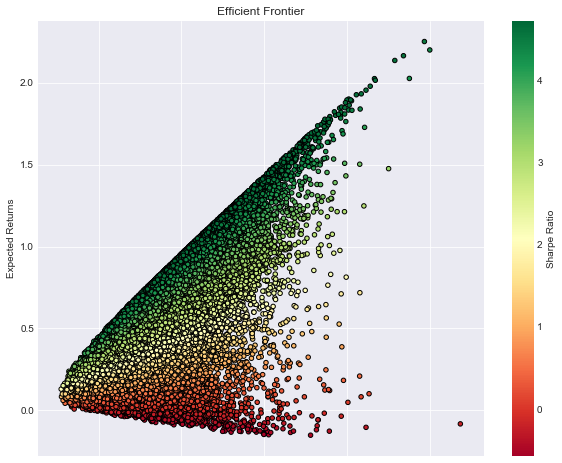

In [30]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
portf.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [31]:
best_df = portf[(portf.Volatility< 0.1301) & (portf.Volatility > 0.1299)]

In [63]:
best_df.head()

,Returns,Volatility,Sharpe Ratio,btc Weight,spy Weight,tlt Weight,vxx Weight,xlf Weight,fxi Weight
1461,0.546693,0.129993,4.090180,0.130470,0.238983,0.257495,0.013020,0.251878,0.108155
2210,0.290610,0.130095,2.118528,0.088071,0.068180,0.213031,0.222494,0.207021,0.201204
2876,0.113188,0.130055,0.754969,0.035820,0.296062,0.089647,0.269443,0.199223,0.109804
2904,0.570114,0.129998,4.270166,0.158456,0.287828,0.095004,0.125438,0.139141,0.194133
3784,0.304680,0.129984,2.228586,0.097305,0.031680,0.273364,0.204665,0.113435,0.279551


In [101]:
best_df['Returns'].index

Int64Index([ 1461,  2210,  2876,  2904,  3784,  4871,  5746,  7374,  7396,
             8383,  8412,  8602,  8801, 10271, 10947, 11082, 11448, 11600,
            11636, 11706, 12109, 12540, 13376, 13768, 14053, 15524, 15887,
            16932, 17428, 18055, 19103, 20607, 21060, 21762, 23875, 26068,
            29283, 29319, 29596, 29772, 29956, 31756, 32790, 32792, 34239,
            34370, 35050, 37907, 38326, 38598, 38704, 38749, 39956, 40225,
            40374, 40539, 40963, 43007, 43338, 44917, 45524, 46482, 47069,
            47456, 47998, 49538],
           dtype='int64')

In [102]:
best_df['Returns'].index[best_df['Returns'] == 0.546693]

Int64Index([], dtype='int64')

In [84]:
cur = 0
max_index = 0
for x in best_df['Returns']:
    if best_df['Returns'][i] >cur:
        cur = best_df['Returns'][i]
        max_index = i
        


    

In [86]:
best_df.loc[max_index]

Returns         0.602096
Volatility      0.130030
Sharpe Ratio    4.515093
btc Weight      0.162289
spy Weight      0.229645
tlt Weight      0.236801
vxx Weight      0.080876
xlf Weight      0.187296
fxi Weight      0.103093
Name: 17428, dtype: float64

In [83]:
best_df['Returns'][46482]

0.3544572961324888

In [80]:
best_df['Returns'][17428]

0.6020962662408236

In [76]:
best_df['Returns'].idxmax()

17428

In [32]:
best_return = best_df.loc[best_df['Returns'].idxmax()]
best_sharpe_ratio = best_df.loc[best_df['Sharpe Ratio'].idxmax()]

In [33]:
best_return

Returns         0.602096
Volatility      0.130030
Sharpe Ratio    4.515093
btc Weight      0.162289
spy Weight      0.229645
tlt Weight      0.236801
vxx Weight      0.080876
xlf Weight      0.187296
fxi Weight      0.103093
Name: 17428, dtype: float64

In [34]:
best_sharpe_ratio

Returns         0.602096
Volatility      0.130030
Sharpe Ratio    4.515093
btc Weight      0.162289
spy Weight      0.229645
tlt Weight      0.236801
vxx Weight      0.080876
xlf Weight      0.187296
fxi Weight      0.103093
Name: 17428, dtype: float64

# Part 2

# Cap Weighted

In [35]:
mca = {'btc': 13.5, 'spy': 259.06, 'tlt': 6.3, 'vxx': 0.8, 'xlf': 31.04, 'fxi':4.49}

In [36]:
for i in mca:
    print(i, mca[i]/sum(mca.values()))

btc 0.04283130809987626
spy 0.821916938989181
tlt 0.019987943779942254
vxx 0.0025381515911037785
xlf 0.09848028173482659
fxi 0.014245375805069956


# Min Variance

# Methods 1: using the methods in my homework 6 (monte carlo simulation to find the min variance)

In [37]:
min_volatility = portf['Volatility'].min()

In [38]:
min_variance_port = portf.loc[portf['Volatility'] == min_volatility]

In [39]:
min_variance_port.T

,40901
Returns,0.129598
Volatility,0.054805
Sharpe Ratio,2.090989
btc Weight,0.026397
spy Weight,0.447245
tlt Weight,0.287633
vxx Weight,0.103449
xlf Weight,0.060813
fxi Weight,0.074463


# Methods 2: Using scipy.optimze to find the max sharp ratio with min variance 

In [40]:
# Calculates portfolio mean return
def port_mean(W, R):
    return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
    return np.dot(np.dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
    return port_mean(W, R), port_var(W, C)

In [41]:
# Given risk-free rate, assets returns and covariances, this function calculates
# weights of tangency portfolio with respect to sharpe ratio maximization
def solve_weights(R, C, rf):
    def fitness(W, R, C, rf):
        mean, var = port_mean_var(W, R, C)  # calculate mean/variance of the portfolio
        util = (mean - rf) / np.sqrt(var)  # utility = Sharpe ratio
        return 1 / util  # maximize the utility, minimize its inverse value
    n = len(R)
    W = np.ones([n]) / n  # start optimization with equal weights
    b_ = [(0., 1.) for i in range(n)]  # weights for boundaries between 0%..100%. No leverage, no shorting
    c_ = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})  # Sum of weights must be 100%
    optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_)
    if not optimized.success: raise BaseException(optimized.message)
    return optimized.x

In [42]:
annual_returns

btc    3.315230
spy    0.126030
tlt    0.014784
vxx   -0.424494
xlf    0.298959
fxi    0.096668
dtype: float64

In [43]:
annual_covariance

,btc,spy,tlt,vxx,xlf,fxi
btc,0.514416,0.004759,0.000655,-0.009850,0.004047,-0.001565
spy,0.004759,0.016326,-0.005182,-0.073478,0.018654,0.020766
tlt,0.000655,-0.005182,0.015600,0.022132,-0.010457,-0.007530
vxx,-0.009850,-0.073478,0.022132,0.461633,-0.086668,-0.096414
xlf,0.004047,0.018654,-0.010457,-0.086668,0.060978,0.023314
fxi,-0.001565,0.020766,-0.007530,-0.096414,0.023314,0.057419


In [44]:
# btc, spy, tlt, vxx, xlf, fxi
solve_weights(annual_returns, annual_covariance, 0.015)

array([ 4.34254036e-01,  7.01548339e-02,  1.99966029e-01,  4.07632229e-04,
        3.08993611e-01, -1.37761421e-02])

# Risk-parity

In [45]:
combined5.head()

,btc,spy,tlt,vxx,xlf,fxi
Date,,,,,,
2015-03-09,290.019989,196.044159,115.734543,442.559998,14.388450,39.373985
2015-03-10,291.369995,192.863953,117.257355,456.160004,14.081054,38.458961
2015-03-11,295.600006,192.412338,118.111649,467.679993,14.169726,38.553299
2015-03-12,293.850006,194.858627,118.028046,439.679993,14.477120,38.940056
2015-03-13,287.209991,193.663681,117.665939,449.600006,14.376628,39.138153


In [46]:
combined_ret = combined5.pct_change(1)

In [47]:
combined_ret.head()

,btc,spy,tlt,vxx,xlf,fxi
Date,,,,,,
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,0.004655,-0.016222,0.013158,0.030730,-0.021364,-0.023239
2015-03-11,0.014518,-0.002342,0.007286,0.025254,0.006297,0.002453
2015-03-12,-0.005920,0.012714,-0.000708,-0.059870,0.021694,0.010032
2015-03-13,-0.022597,-0.006132,-0.003068,0.022562,-0.006941,0.005087


In [48]:
btc_std = combined_ret.btc.std()
spy_std = combined_ret.spy.std()
tlt_std = combined_ret.tlt.std()
vxx_std = combined_ret.vxx.std()
xlf_std = combined_ret.xlf.std()
fxi_std = combined_ret.fxi.std()

In [49]:
btc_std_inv = 1/combined_ret.btc.std()
spy_std_inv = 1/combined_ret.spy.std()
tlt_std_inv = 1/combined_ret.tlt.std()
vxx_std_inv = 1/combined_ret.vxx.std()
xlf_std_inv = 1/combined_ret.xlf.std()
fxi_std_inv = 1/combined_ret.fxi.std()

In [50]:
#stds_inv = [btc_std_inv,spy_std_inv,tlt_std_inv,vxx_std_inv, xlf_std_inv,fxi_std_inv ]
stds_inv = {'btc': btc_std_inv, 'spy': spy_std_inv, 'tlt': tlt_std_inv, 'vxx':vxx_std_inv, 'xlf': xlf_std_inv, 'fxi':fxi_std_inv}

In [51]:
for x in stds_inv:
    print(x, stds_inv[x]/sum(stds_inv.values()))
    

btc 0.051789356515100526
spy 0.29070857401165046
tlt 0.2973963602988678
vxx 0.054670034349038145
xlf 0.150421509737437
fxi 0.15501416508790622


# First eigenportfolio

In [52]:
# correlation matrix
corr = combined_ret.corr()

In [53]:
corr.head()

,btc,spy,tlt,vxx,xlf,fxi
btc,1.000000,0.051928,0.007310,-0.020212,0.022852,-0.009103
spy,0.051928,1.000000,-0.324704,-0.846391,0.591218,0.678254
tlt,0.007310,-0.324704,1.000000,0.260797,-0.339050,-0.251602
vxx,-0.020212,-0.846391,0.260797,1.000000,-0.516562,-0.592193
xlf,0.022852,0.591218,-0.339050,-0.516562,1.000000,0.394011


In [54]:
#dataframe to matrix, prepare for eigenvector and eigenvalue calculation
corr_mat = corr.as_matrix()

In [55]:
#eigenvalues
eig_vals = np.linalg.eig(corr_mat)[0]
#eigenvectors
eig_vecs = np.linalg.eig(corr_mat)[1]

In [56]:
#the first eigenvector
eigenvec_1 = eig_vecs[:,0]

In [57]:
eigenvec_1

array([ 0.02071908,  0.53532077, -0.28009758, -0.50419143,  0.42349108,
        0.4483236 ])

In [58]:
#standard deviation
stds = combined_ret.std()
stds
#std_1 =  np.std(eigenvec_1)

btc    0.045181
spy    0.008049
tlt    0.007868
vxx    0.042800
xlf    0.015556
fxi    0.015095
dtype: float64

In [59]:
eigenvec_1/stds

btc     0.458578
spy    66.508080
tlt   -35.599794
vxx   -11.780054
xlf    27.224298
fxi    29.700617
dtype: float64

In [60]:
w1 = (eigenvec_1/stds)/sum( eigenvec_1/stds)

In [61]:
w1

btc    0.005994
spy    0.869253
tlt   -0.465285
vxx   -0.153964
xlf    0.355819
fxi    0.388184
dtype: float64